In [1]:
!pip3 install face_recognition

In [ ]:
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition

#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames
#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path) 
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

base_path = 'C:/Users/dwije/Desktop/VIII_SEM_PROJECT/Deepfake_detection_using_ResNet/DataSetPreparation/Preprocessed_Data'

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
video_fil =  glob.glob(f'{base_path}/Celeb_fake/*.mp4')
video_fil += glob.glob(f'{base_path}/Celeb_real/*.mp4')
video_fil += glob.glob(f'{base_path}/FF/*.mp4')
video_fil += glob.glob(f'{base_path}/DFDC_fake/*.mp4')
video_fil += glob.glob(f'{base_path}/DFDC_real/*.mp4')

print("Total no of videos :" , len(video_fil))

count = 0
for i in video_fil:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video_fil) - count))
    print("Corrupted video is : " , i)
    continue
print((len(video_fil) - count))

Total no of videos : 6448
0


In [ ]:
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random
base_path = 'C:/Users/dwije/Desktop/VIII_SEM_PROJECT/Deepfake_detection_using_ResNet/DataSetPreparation/Preprocessed_Data'

video_files =  glob.glob(f'{base_path}/Celeb_fake/*.mp4')
video_files += glob.glob(f'{base_path}/Celeb_real/*.mp4')
video_files += glob.glob(f'{base_path}/FF/*.mp4')
video_files += glob.glob(f'{base_path}/DFDC_fake/*.mp4')
video_files += glob.glob(f'{base_path}/DFDC_real/*.mp4')
random.shuffle(video_files)
random.shuffle(video_files)
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames are  [168, 168, 168, 168, 168, 168, 168, 168, 168, 137, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 154, 168, 166, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 166, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 16

In [4]:
# load the video name and labels from csv
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('/')[-1]
        #print(temp_video)
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path) 
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [6]:
# load the labels and video in data loader
import random
import pandas as pd
# from sklearn.model_selection import train_test_split # type: ignore

header_list = ["file","label"]
labels = pd.read_csv('./labels/metadata.csv',names=header_list)

train_videos = video_files[:int(0.7*len(video_files))]
valid_videos = video_files[int(0.7*len(video_files)):]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))

# train_videos,valid_videos = train_test_split(data,test_size = 0.3)
# print(train_videos)

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)

train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 4)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 4)

train :  4087
test :  1752


In [7]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [ ]:
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

fmap shape: torch.Size([20, 2048, 7, 7])
b shape: torch.Size([1, 2])


In [17]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os

def train_epoch(data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        
        _, outputs = model(inputs)
        loss = criterion(outputs, targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    torch.save(model.state_dict(), '/content/checkpoint.pt')
    return losses.avg, accuracies.avg

def test(model, data_loader, criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            
            _, outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
            _, p = torch.max(outputs, 1) 
            
            true += (targets.type(torch.cuda.LongTensor)).cpu().numpy().tolist()
            pred += p.cpu().numpy().tolist()
            
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
    
    return true, pred, losses.avg, accuracies.avg

class AverageMeter(object):
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0
    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)
    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    return 100 * correct.float().sum().item() / batch_size

In [11]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')

    # Create a DataFrame for Seaborn
    df_cm = pd.DataFrame(cm, index=['Actual Fake', 'Actual Real'], columns=['Pred Fake', 'Pred Real'])
    
    # Plot confusion matrix
    sn.set(font_scale=1.4)  # Adjust label size
    plt.figure(figsize=(6,4))
    sn.heatmap(df_cm, annot=True, fmt='d', annot_kws={"size": 16}, cmap="Blues", linewidths=1, linecolor='black')
    
    # Labels & titles
    plt.ylabel('Actual Label', size=16)
    plt.xlabel('Predicted Label', size=16)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.savefig("cm.png")
    
    plt.show()

    # Compute accuracy
    calculated_acc = (cm[0][0] + cm[1][1]) / cm.sum()
    print("Calculated Accuracy:", calculated_acc * 100, "%")


In [12]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.savefig("loss_plot.png")
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.savefig("accuracy_plot.png")
  plt.show()

Epoch 1/20 - Train Loss: 1.25, Train Acc: 65.3125%, Test Loss: 1.10, Test Acc: 72.1372%
Epoch 2/20 - Train Loss: 1.05, Train Acc: 72.8348%, Test Loss: 0.92, Test Acc: 78.4849%
Epoch 3/20 - Train Loss: 0.89, Train Acc: 78.6762%, Test Loss: 0.80, Test Acc: 82.2615%
Epoch 4/20 - Train Loss: 0.75, Train Acc: 83.5981%, Test Loss: 0.72, Test Acc: 85.6293%
Epoch 5/20 - Train Loss: 0.63, Train Acc: 87.1437%, Test Loss: 0.66, Test Acc: 88.3507%
Epoch 6/20 - Train Loss: 0.52, Train Acc: 90.3593%, Test Loss: 0.58, Test Acc: 91.0764%
Epoch 7/20 - Train Loss: 0.43, Train Acc: 92.8824%, Test Loss: 0.52, Test Acc: 93.1821%
Epoch 8/20 - Train Loss: 0.37, Train Acc: 94.5615%, Test Loss: 0.48, Test Acc: 94.2436%
Epoch 9/20 - Train Loss: 0.32, Train Acc: 95.8279%, Test Loss: 0.44, Test Acc: 95.0958%
Epoch 10/20 - Train Loss: 0.28, Train Acc: 96.5430%, Test Loss: 0.41, Test Acc: 95.5241%
Epoch 11/20 - Train Loss: 0.25, Train Acc: 97.1856%, Test Loss: 0.39, Test Acc: 96.0689%
Epoch 12/20 - Train Loss: 0.22

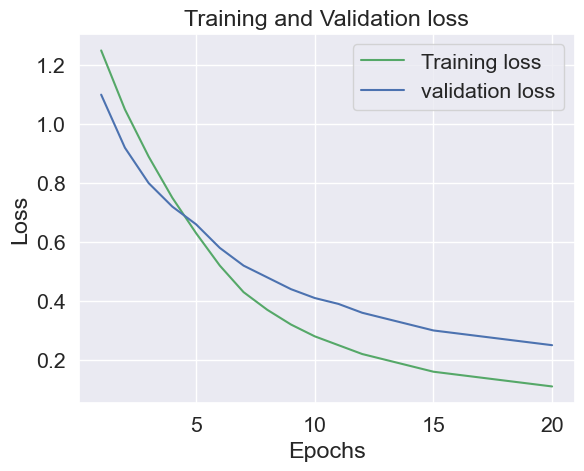

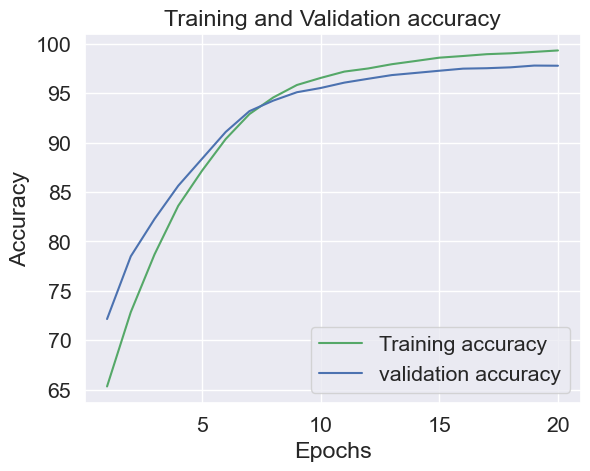

[[0 0 1]
 [1 0 0]
 [0 0 0]]
True positive =  922
False positive =  21
False negative =  22
True negative =  971




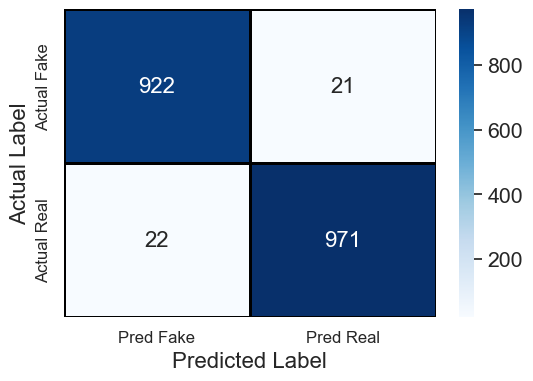

Calculated Accuracy: 97.77892561983471 %


In [ ]:
from sklearn.metrics import confusion_matrixz
#learning rate
lr = 1e-5#0.001
#number of epochs 
num_epochs = 20

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []

for epoch in range(1, num_epochs + 1):
    train_loss, train_acc = train_epoch(train_loader, model, criterion, optimizer)
    train_loss_avg.append(train_loss)
    train_accuracy.append(train_acc)

    true, pred, test_loss, test_acc = test(model, valid_loader, criterion)
    test_loss_avg.append(test_loss)
    test_accuracy.append(test_acc)

    # Print formatted output for each epoch
    print(f"Epoch {epoch}/{num_epochs} - Train Loss: {train_loss:.2f}, Train Acc: {train_acc:.4f}%, "
          f"Test Loss: {test_loss:.2f}, Test Acc: {test_acc:.4f}%")
    
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)